# Code for Hierarchical Clustering to obtain labels (suitability category)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [2]:
#Loading locational dataset
df = pd.read_csv('data-scaled-agg.csv', index_col='County')
df.head(20)

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest
County,,,,,,,,,,,
51001,0.075854,0.148920,0.319901,0.435870,0.410805,0.412876,0.398849,0.223717,0.178736,0.296552,0.064338
51003,0.108095,0.182011,0.281478,0.361577,0.330150,0.398268,0.652957,0.669414,0.672845,0.580575,0.679813
51005,0.187226,0.147870,0.208440,0.382735,0.309672,0.361536,0.590581,0.651482,0.660489,0.531379,0.897165
51007,0.157467,0.144258,0.319836,0.347694,0.488828,0.370654,0.753323,0.808243,0.809483,0.716207,0.651586
51009,0.184217,0.145333,0.205452,0.416978,0.325681,0.367647,0.499006,0.525380,0.539368,0.463678,0.770831
51011,0.140248,0.158561,0.278259,0.427413,0.398133,0.403431,0.427002,0.337238,0.280747,0.347356,0.662506
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,0.089268
51015,0.197927,0.147820,0.225123,0.379990,0.321457,0.383072,0.615071,0.686479,0.682759,0.561379,0.582228
51017,0.382682,0.130588,0.262562,0.372108,0.370891,0.394608,0.681005,0.768185,0.779741,0.641724,0.899831


In [3]:
TEST_RATIO = 0.2
BATCH_SIZE = 64

size_all = len(df)

# training/val/test dataset
size_train = size_all - 6
size_val = int(size_train * TEST_RATIO)
size_train_sub = size_train - size_val

# split data into train and test
# Test = 6 counties of interst: Accomack, Fauquier, Greensville, Hanover, Rockingham, Wise
dataset_test = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]

# Train = all except 6 counties of interest
dataset_train = df.drop([51001, 51061, 51081, 51085, 51165, 51195])


In [4]:
# Using the elbow method to determine the k value to be applied
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']])
    sse.append(km.inertia_)

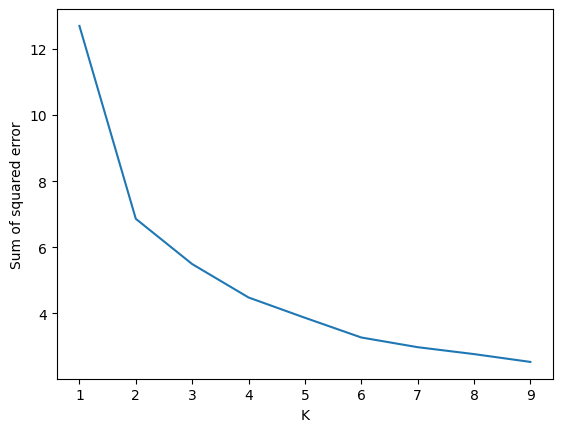

In [5]:
# Plot to obtain elbow
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [6]:
# create clusters using k value = 4
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [7]:
# Determining mean cluster characterisitics
y_hc = hc.fit_predict(dataset_train[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']])
dataset_train['cluster'] = y_hc
dataset_train.sort_values("cluster", inplace = True, ascending=True)

#average input vars by cluster
df_cluster = dataset_train.groupby('cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<Axes: ylabel='cluster'>

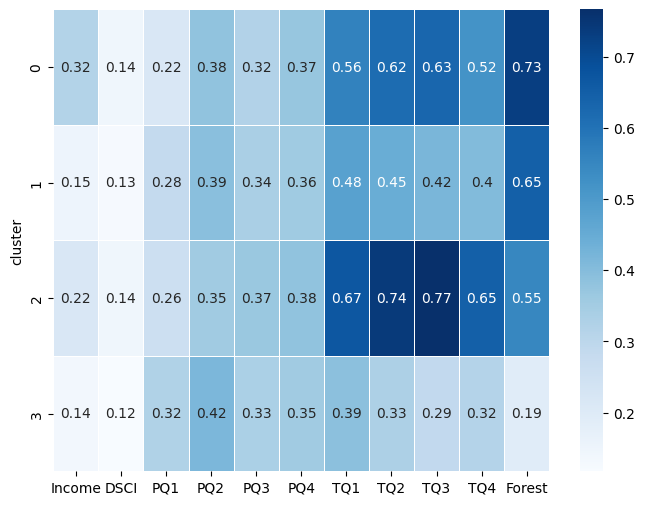

In [8]:
#Heatmap of cluster characteristics
plt.figure(figsize=(8,6))
sns.heatmap(df_cluster, annot=True, cmap="Blues", linewidths=.5)

In [9]:
# see how clusters are distributed
dataset_train['cluster'].value_counts()

2    36
1    23
0    21
3     4
Name: cluster, dtype: int64

In [10]:
# Look at counties in smallest cluster
dataset_train[dataset_train['cluster'] == 3]

,Income,DSCI,PQ1,PQ2,PQ3,PQ4,TQ1,TQ2,TQ3,TQ4,Forest,cluster
County,,,,,,,,,,,,
51013,0.142115,0.105105,0.229655,0.409510,0.284420,0.314118,0.436525,0.430658,0.397845,0.371264,0.089268,3
51115,0.131867,0.118457,0.362594,0.415861,0.354178,0.358072,0.411094,0.293565,0.254598,0.315172,0.224077,3
51131,0.099351,0.117189,0.439573,0.415893,0.389930,0.397124,0.467713,0.404628,0.346264,0.386092,0.098323,3
51107,0.176528,0.129553,0.262200,0.422371,0.304163,0.345719,0.243119,0.193782,0.158764,0.189310,0.359856,3


In [11]:
#To obtain the entire cluster labels
print(hc.labels_)

[0 0 2 0 1 3 2 0 0 1 1 0 0 1 0 2 2 2 2 1 1 0 1 0 2 2 2 2 0 0 2 1 2 0 2 2 2
 2 1 1 2 1 2 2 0 2 3 0 1 1 3 1 2 2 0 2 3 1 1 2 2 0 2 1 0 2 2 0 2 0 1 1 1 1
 0 2 2 2 2 2 1 2 1 2]


# Categorizing the clusters as suitability levels

In [12]:
# Need to research into what factors lead to land being more suitable for forestation
# Then assign levels based on the averages of each cluster from above

# Maybe redo if we can get more data and redo clusters


# Supervised ML for suitability prediction (Random Forest)

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 6)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [14]:
# Reading data
# df = pd.read_csv("Labelled Normalised DACCS data.csv")

In [15]:
# creating input identity
sub_df = dataset_train[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]
X = sub_df
y = dataset_train.cluster
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1)

In [16]:
# creating Model (with 100 trees)
rf = RandomForestClassifier(n_estimators=100)

In [17]:
# Fitting training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# see which counties are in test
y_test.index

Int64Index([51051, 51099, 51143, 51117, 51107, 51121, 51089, 51043, 51155,
            51183, 51127, 51101, 51137, 51095, 51177, 51073, 51171, 51023,
            51135, 51029, 51047, 51045, 51115, 51097, 51033, 51017],
           dtype='int64', name='County')

In [19]:
# y prediction for set of data
y_pred = rf.predict(X_test)
print(y_pred)

[2 2 2 1 1 2 1 1 0 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 2 2]


In [20]:
# To get model performance
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      1.00      0.90         9
           2       0.79      0.92      0.85        12
           3       0.00      0.00      0.00         2

    accuracy                           0.77        26
   macro avg       0.40      0.48      0.44        26
weighted avg       0.65      0.77      0.70        26



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Determining feature importance (Model Interpretation)
feature_imp = pd.DataFrame(rf.feature_importances_,index= X_train.columns,
columns=['importance']).sort_values('importance',ascending=False)
print(feature_imp)

        importance
TQ4       0.203431
TQ2       0.185683
TQ3       0.155322
Forest    0.113025
TQ1       0.093874
Income    0.069331
PQ1       0.051551
PQ2       0.039935
DSCI      0.032565
PQ4       0.027991
PQ3       0.027291


<Axes: >

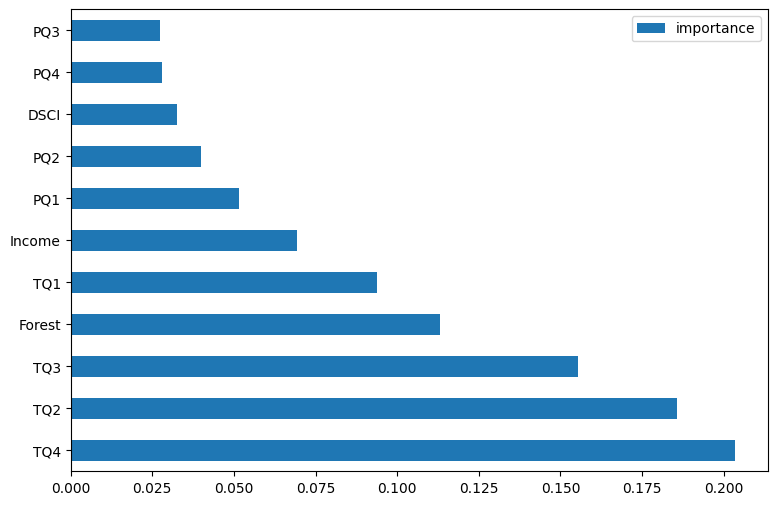

In [22]:
#Feature importance visualisation
feature_imp.plot(kind='barh')

# Supervised ML for suitability prediction (Neural Net)
## Simple ANN

In [23]:
# loading everything that might be helpful
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image
import torch
from torch.utils.data import DataLoader, random_split
from torch import Generator
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torch import manual_seed as torch_manual_seed
import random
import numpy as np

from torch.cuda import max_memory_allocated, set_device, manual_seed_all
from torch.backends import cudnn

def setup_seed(seed):
    torch_manual_seed(seed)
    manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    cudnn.deterministic = True

SEED = 42
setup_seed(SEED)

In [24]:
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader

In [25]:
# Test data = 6 counties of interst: Accomack, Fauquier, Greensville, Hanover, Rockingham, Wise
X_test = dataset_test
X_test = X_test[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]

# The test data will not have a cluster assigned- need to predict it
#y_test = df.loc[[51001, 51061, 51081, 51085, 51165, 51195]]
#y_test = y_test['cluster']

# Train data = all but 6 counties of interest
X_train = dataset_train
X_train_full = X_train[['Income','DSCI','PQ1','PQ2','PQ3','PQ4','TQ1','TQ2','TQ3','TQ4','Forest']]

y_train = dataset_train
y_train_full = y_train['cluster']

# Split into train and validation (80:20)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.2, random_state=49)

In [26]:
# Make training data into tensor objects
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)

# Make val data into tensor objects
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

# Make test data into tensor objects
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [28]:
#train data
training_data = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(training_data, batch_size=64)

#test data
test_data = TensorDataset(X_test_tensor)
test_dataloader = DataLoader(test_data, batch_size=64)

#validate data
val_data = TensorDataset(X_val_tensor, y_val_tensor)
val_dataloader = DataLoader(val_data, batch_size=64)

In [29]:
# Simple ANN

In [36]:
import torch.nn as nn

#define model
class net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_model = nn.Sequential(
            nn.Linear(11,100), #11 input columns
            nn.Tanh(),
            nn.Linear(100,4)#4 output classes

    )

    def forward(self, x):
        logits = self.linear_model(x)
        return logits

model = net()
model

net(
  (linear_model): Sequential(
    (0): Linear(in_features=11, out_features=100, bias=True)
    (1): Tanh()
    (2): Linear(in_features=100, out_features=4, bias=True)
  )
)

In [31]:
learning_rate = 0.005
batch_size = 64
epochs = 25
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [32]:
#train loop
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train() #set model in train mode
    size = len(dataloader.dataset)

    for batch, (X,y) in enumerate(dataloader):
        #prediction and loss
        #y = y.unsqueeze(1)
        y = y.long()
        pred = model(X)
        loss = loss_fn(pred, y)

        #backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    if batch % 1 == 0:
        loss, current = loss.item(), batch * batch_size + len(X)
        print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [33]:
def test_loop(train_dataloader, val_dataloader, model, loss_fn):
    model.eval()  # set model in evaluation mode

    size_train = len(train_dataloader.dataset)
    size_val = len(val_dataloader.dataset)

    num_batches_train = len(train_dataloader)
    num_batches_val = len(val_dataloader)

    train_loss, correct_train = 0, 0
    val_loss, correct_val = 0, 0

    # Evaluate model on train data
    with torch.no_grad():
        for X, y in train_dataloader:
            #y = y.unsqueeze(1)
            y = y.long()
            pred = model(X)
            train_loss += loss_fn(pred, y).item()
            correct_train += (pred.argmax(1) == y).type(torch.float).sum().item()

    train_loss /= num_batches_train
    correct_train /= size_train
    print(f"Train Error: \n Accuracy: {(100*correct_train):>0.1f}%, Avg loss: {train_loss:>8f}")

    # Evaluate model on validation data
    with torch.no_grad():
        for X, y in val_dataloader:
            #y = y.unsqueeze(1)
            y = y.long()
            pred = model(X)
            val_loss += loss_fn(pred, y).item()
            correct_val += (pred.argmax(1) == y).type(torch.float).sum().item()

    val_loss /= num_batches_val
    correct_val /= size_val
    print(f"Validation Error: \n Accuracy: {(100*correct_val):>0.1f}%, Avg loss: {val_loss:>8f}")


In [34]:
#run the code for
epochs = 1000
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(train_dataloader, val_dataloader, model, loss_fn)
print("Done!")

Streaming output truncated to the last 5000 lines.
 Accuracy: 70.6%, Avg loss: 1.139051
Epoch 287
-------------------------------
loss: 0.651465  [   67/   67]
Train Error: 
 Accuracy: 70.1%, Avg loss: 0.895500
Validation Error: 
 Accuracy: 70.6%, Avg loss: 1.138686
Epoch 288
-------------------------------
loss: 0.650748  [   67/   67]
Train Error: 
 Accuracy: 70.1%, Avg loss: 0.894910
Validation Error: 
 Accuracy: 70.6%, Avg loss: 1.138322
Epoch 289
-------------------------------
loss: 0.650031  [   67/   67]
Train Error: 
 Accuracy: 70.1%, Avg loss: 0.894321
Validation Error: 
 Accuracy: 70.6%, Avg loss: 1.137958
Epoch 290
-------------------------------
loss: 0.649315  [   67/   67]
Train Error: 
 Accuracy: 70.1%, Avg loss: 0.893733
Validation Error: 
 Accuracy: 70.6%, Avg loss: 1.137594
Epoch 291
-------------------------------
loss: 0.648600  [   67/   67]
Train Error: 
 Accuracy: 70.1%, Avg loss: 0.893145
Validation Error: 
 Accuracy: 70.6%, Avg loss: 1.137230
Epoch 292
-------

# EASY ANN (MLPClassifier from sklearn)

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
clf.predict_proba(X_val)

array([[0.39288166, 0.53150067, 0.03988034, 0.03573734],
       [0.05629019, 0.00999102, 0.92398809, 0.0097307 ],
       [0.19293684, 0.64208792, 0.07604437, 0.08893086],
       [0.26651506, 0.06300134, 0.64006383, 0.03041976],
       [0.09940403, 0.00423281, 0.89184353, 0.00451963],
       [0.02817765, 0.90166106, 0.00279033, 0.06737095],
       [0.0877717 , 0.86171924, 0.01006397, 0.0404451 ],
       [0.25229098, 0.10038593, 0.61260293, 0.03472016],
       [0.13177502, 0.70882812, 0.06877593, 0.09062093],
       [0.20825054, 0.61924001, 0.10907242, 0.06343703],
       [0.15789108, 0.0566973 , 0.75467899, 0.03073262],
       [0.07750788, 0.44671596, 0.26587008, 0.20990608],
       [0.56013336, 0.40186187, 0.0225684 , 0.01543637],
       [0.1893382 , 0.01333427, 0.78558496, 0.01174256],
       [0.59379278, 0.20176984, 0.17997991, 0.02445747],
       [0.09494997, 0.01327994, 0.87746128, 0.01430882],
       [0.59620771, 0.189693  , 0.19434419, 0.0197551 ]])

In [56]:
y_pred = clf.predict(X_val)
y_pred

array([1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 2, 0])

In [57]:
clf.score(X_val, y_val)

0.8823529411764706

In [58]:
cr = classification_report(y_val, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1

    accuracy                           0.88        17
   macro avg       0.68      0.69      0.68        17
weighted avg       0.84      0.88      0.85        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
